# Question 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import h5py
import seaborn as sns
%matplotlib inline

## Part A

In [2]:
def load_dataset(path_dataset:str) -> tuple :
    """
    Given the path of the dataset, return
    training and testing images with respective
    labels.
    """
    
    with h5py.File(path_dataset,'r') as F:
        # Names variable contains the names of training and testing file 
        names = list(F.keys())
        
        X_train = np.array(F[names[2]][:])
        y_train = np.array(F[names[3]][:])
        X_test = np.array(F[names[0]][:])
        y_test = np.array(F[names[1]][:])
        
    y_train = y_train.reshape(y_train.shape[0],1)
    y_test = y_test.reshape(y_test.shape[0],1)
    
    return X_train,y_train,X_test,y_test

In [3]:
X_train,y_train,X_test,y_test = load_dataset('assign1_data1.h5')

In [4]:
def print_shapes():
    print(f"X_train has a shape  : {X_train.shape} and contains {X_train.shape[0]} training images with 28x28 pixel" )
    print(f"y_train has a shape  : {y_train.shape}")
    print(f"X_test  has a shape  : {X_test.shape}  and contains {X_test.shape[0]} training images with 28x28 pixel" )
    print(f"y_test  has a shape  : {y_test.shape}")
print_shapes()

X_train has a shape  : (5200, 28, 28) and contains 5200 training images with 28x28 pixel
y_train has a shape  : (5200, 1)
X_test  has a shape  : (1300, 28, 28)  and contains 1300 training images with 28x28 pixel
y_test  has a shape  : (1300, 1)


In [5]:
def unique_images(X: np.ndarray,Y:np.ndarray) -> list:
    """
    Given traning and testing images, 
    return  images of unique alphabet letters
    """
    size = X.shape[0]
    letter = 1
    uniqe_letter = []   
    unique_image = None 
    uniqe_index = []
    
    for i in range(size):
        if letter == int(Y[i]):            
            unique_image = X[i]           
            uniqe_letter.append(unique_image)
            uniqe_index.append(i)
            letter += 1
            
    return uniqe_letter,uniqe_index  

In [6]:
images,indexes = unique_images(X_test,y_test) 

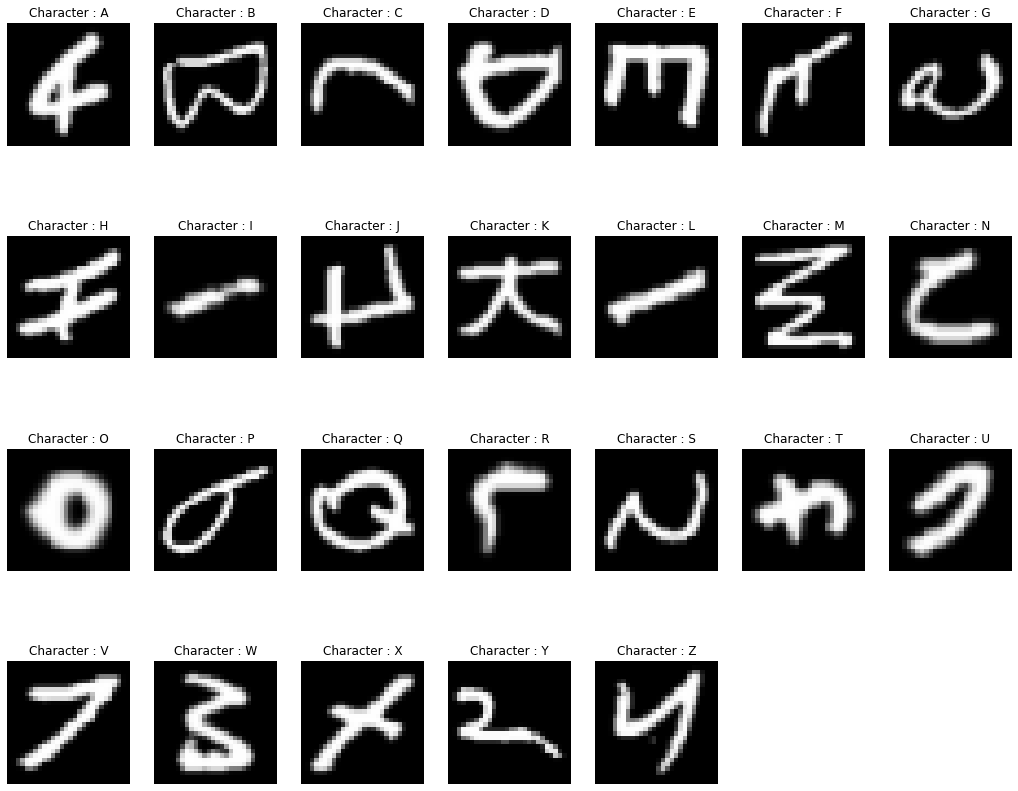

In [7]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
       'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(18,15))

for letter,image in enumerate(images):
    plt.subplot(4,7,letter+1)
    plt.imshow(image,cmap='gray')   
    plt.axis('off')
    plt.title(f"Character : {alphabet[letter]}")
    

In [8]:
def corr(X,nclass,pos):
    mat = np.zeros(nclass*nclass).reshape(nclass,nclass)
    x = X.T
    for i in range(nclass):
        for j in range(nclass):
            mat[i,j] = np.corrcoef(x[:,:,pos[i]].flat, x[:,:,pos[j]].flat)[0,1]
    return mat        

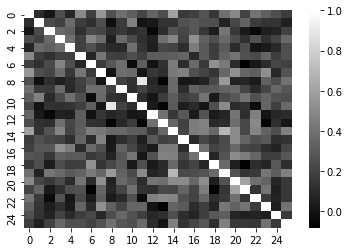

In [9]:
df_correlation_same = pd.DataFrame(corr(X_test,nclass=26,pos = indexes))
sns.heatmap(df_correlation_same, annot = False , cmap = 'gray')
plt.show()

## Part B

In [10]:
def one_hot_encoder(Y):
    classes = int(np.max(Y))
    dim = Y.shape[0]
    val = np.zeros(classes*dim).reshape(dim,classes)
    
    for num in range(dim):
        val[num,int(Y[num])-1] = 1
        
    return val

In [11]:
y_train = one_hot_encoder(y_train)
y_test = one_hot_encoder(y_test)

In [12]:
print_shapes()

X_train has a shape  : (5200, 28, 28) and contains 5200 training images with 28x28 pixel
y_train has a shape  : (5200, 26)
X_test  has a shape  : (1300, 28, 28)  and contains 1300 training images with 28x28 pixel
y_test  has a shape  : (1300, 26)


In [13]:
def flatten_images(X1,X2):
    X1 = X1.reshape(X1.shape[0],-1)
    X2 = X2.reshape(X2.shape[0],-1)
    
    return X1,X2

In [14]:
X_train,X_test = flatten_images(X_train,X_test)

In [15]:
def normalize(X):
    return X/255

In [16]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [17]:
print_shapes()

X_train has a shape  : (5200, 784) and contains 5200 training images with 28x28 pixel
y_train has a shape  : (5200, 26)
X_test  has a shape  : (1300, 784)  and contains 1300 training images with 28x28 pixel
y_test  has a shape  : (1300, 26)


In [18]:
class SingleLayerNN():     
    def __init__(self, learning_rate):
        np.random.seed(0)
        # Introducing bias and weight terms with  Gaussian distribution N(0; 0:01)
        self.bias = np.random.normal(loc = 0 ,scale = 0.01 ,size = (1,26))        
        self.W = np.random.normal(loc = 0 ,scale = 0.01 ,size =(784,26))
        
        # Learning rate :
        self.lr = learning_rate
        
        # To keep track loss function :
        self.cost = []       
        
        
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    
    def sigmoid_der(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    def fit(self,X,Y,iterations,verbose = True):
        """
        Given the training images and their corresponding
        labels, fitting the model by :
        1) Forwarding the input to the output layer
        2) Calculate the loss
        3) Back propagation
        4) Update the weights and bias according to the
        gradient descent rule
        
        """
        # As proposed , 10000 epoch :
        for iter in range(iterations):
            
            # Randomly selected numbers between 0 and 5200
            random_index = np.random.randint(0,X.shape[0])                       
            
            # Indexing randomly for training image
            X_temp = X[random_index].reshape(1,X.shape[1])
            
            # Indexing randomly for training image's label
            y_temp = Y[random_index].reshape(1,Y.shape[1])
            
            # Feed forwarding input 
            Z = np.dot(X_temp,self.W) + self.bias
            
            # Passing activation unit
            A = self.sigmoid(Z)
                
            
            # Calculating the error
            error = A - y_temp
            
            # Loss function : Mean Squared Error
            MSE = np.square(error).mean()            
            
            # Adding losses to visualize 
            self.cost.append(MSE)
            
            if verbose == True:
                if epoch % 100 == 0:
                    print(f"The epoch number : {iter} ----> MSE : {MSE} ")
            
            # Back propagation part 
            
            # Calculation of derivatives
            
            # The derivative of Error with respect to the output 
            derror_douto = error
            
            # The derivative of output with respect to the input 
            douto_dino = self.sigmoid_der(Z)
            
            
            deriv = derror_douto * douto_dino 
            
            # The derivative of input with respect to the weight , then multiply all
            deriv_final = np.dot(X_temp.T,deriv)
            
            # Updated weights and bias term according to the gradient descent
            
            self.W -= self.lr * deriv_final            
            self.bias -= self.lr * deriv
                
    def display_weight(self):
        """
        Visualization of the final weight elements
        """
        
        plt.figure(figsize=(18,15))
        for i in range(26):
            plt.subplot(4,7,i+1)
            plt.imshow(self.W.T[i,:].reshape(28,28),cmap='gray')
            plt.axis('off')
            plt.title(f"Class : {alphabet[i]}")

    
    def predict(self,X):
        """
        Feed forwarding to test new images and classification
        """
        return self.sigmoid(np.dot(X,self.W)+self.bias)   
        
    def evaluate(self):
        """
        Evaluation of the model by visualization of MSE
        """
        print(f"MSE loss is : {self.cost[-1]}")
        plt.plot(range(len(self.cost)),self.cost)
        plt.xlabel('# of Iterations')
        plt.ylabel('MSE Loss Function')
        plt.title('Model evaluation')  
      

In [19]:
def accuracy(Y1,Y2):
    """
    Given one prediction and their test label
    counting how many correct outputs do model have
    then dividing it by the total number to give
    accuracy score
    """
    assert(Y1.shape == Y2.shape)
    size = Y1.shape[0]
    count = 0
    for i in range(size):
        if np.argmax(Y1[i]) == np.argmax(Y2[i]):
            count += 1
    return (count/size)*100

def grid_search(X_train,Y_train,X_test,y_test,learning_rates):
    acc = []
    for lr in learning_rates:
        temp_model = SingleLayerNN(lr)
        temp_model.fit(X_train,y_train,10000,False)
        pred = temp_model.predict(X_test)
        acc.append(accuracy(y_test,pred))
        
    val = learning_rates[np.argmax(acc)]   
    
    return val,SingleLayerNN(val)

# Trying the learning rate for = 0.1,0.2,...,0.9
learning_rates = [i*0.01 for i in range(1,10)]

best_lr, best_model = grid_search(X_train,y_train,X_test,y_test,learning_rates)
print(f" Optimal learning rate is {best_lr}")
best_model.fit(X_train,y_train,10000,False)
# Predictions 
best_predictions = best_model.predict(X_test)


# Accuracy Score :
print(f"Accuracy is {accuracy(y_test,best_predictions)}")

 Optimal learning rate is 0.06
Accuracy is 60.38461538461538


MSE loss is : 0.04292531067627485


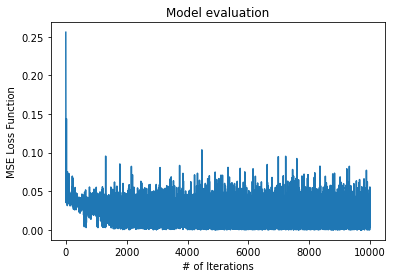

In [20]:
best_model.evaluate()

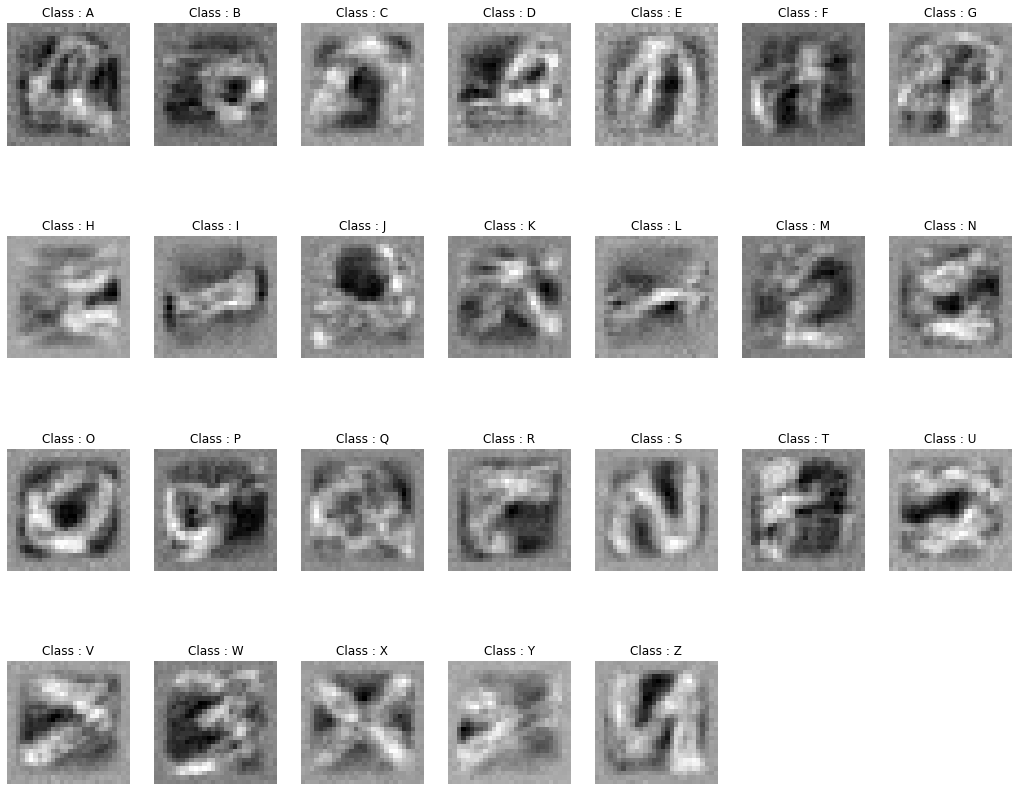

In [21]:
best_model.display_weight()

In [22]:
model = SingleLayerNN(0.054)
model.fit(X_train,y_train,10000,False)
print(f"Best possible accuracy is {accuracy(y_test,model.predict(X_test))}")

Best possible accuracy is 61.0


## Part C

In [23]:
# substantially higher and a subtantially lower learning rate
# so multiplying learning rate by 10 and divided by 10, respectively


learningRate = [best_lr * i for i in [10,1,0.1]]
MeanSqrtError = []

for i in learningRate:
    model_temp = SingleLayerNN(learning_rate = i)
    model_temp.fit(X_train,y_train,iterations = 10000, verbose = False)
    MeanSqrtError.append(model_temp.cost)

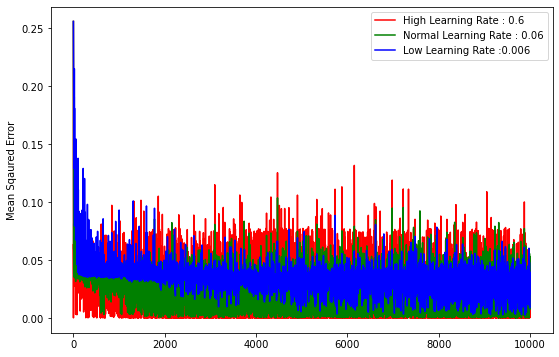

In [24]:
plt.figure(figsize=(9,6))
plt.plot(MeanSqrtError[0], color = 'r')
plt.plot(MeanSqrtError[1], color = 'g')
plt.plot(MeanSqrtError[2], color = 'b')
plt.ylabel('Mean Sqaured Error')
plt.legend([f'High Learning Rate : {learningRate[0]}',f'Normal Learning Rate : {learningRate[1]}', 
            f'Low Learning Rate :{learningRate[2]}'])
plt.show()

## Part D

In [25]:
# I created 3 model with different learning rates as proposed,
# from higher to lower.
model_1 = SingleLayerNN(learningRate[0])
model_2 = SingleLayerNN(learningRate[1])
model_3 = SingleLayerNN(learningRate[2])

# Fitting the model
model_1.fit(X_train,y_train,10000,False)
model_2.fit(X_train,y_train,10000,False)
model_3.fit(X_train,y_train,10000,False)

In [26]:
# Predictions :
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)


In [27]:
print(f" Model 1 Accuracy : {accuracy(y_pred_1,y_test)}")
print(f" Model 2 Accuracy : {accuracy(y_pred_2,y_test)}")
print(f" Model 3 Accuracy : {accuracy(y_pred_3,y_test)}")

 Model 1 Accuracy : 52.46153846153846
 Model 2 Accuracy : 59.692307692307686
 Model 3 Accuracy : 34.15384615384615
